# Perceptron Algorithm - Wine Quality Dataset

## Overview
The Perceptron is a linear classifier for binary classification. 
We will use it to classify wine quality as high (>=6) or low (<6).

---

# 1. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 2. Load Dataset

In [4]:
# Load Wine Quality Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

# Features and binary target
X = data.drop('quality', axis=1).values
y = (data['quality'] >= 6).astype(int).values  # 1 = high, 0 = low

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 3. Preprocessing
- Split data into train and test sets
- Standardize features

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train Perceptron Model

In [6]:
clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
clf.fit(X_train_scaled, y_train)

Perceptron(random_state=42)

# 5. Evaluate Model

In [7]:
y_pred = clf.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.7219
Confusion Matrix:
 [[107  42]
 [ 47 124]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.72      0.71       149
           1       0.75      0.73      0.74       171

    accuracy                           0.72       320
   macro avg       0.72      0.72      0.72       320
weighted avg       0.72      0.72      0.72       320



# 6. Visualization

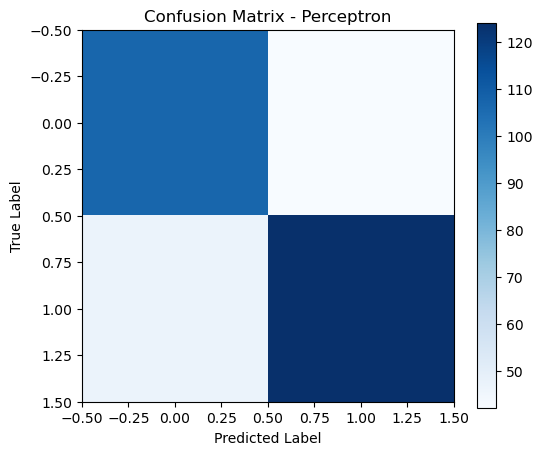

In [8]:
plt.figure(figsize=(6,5))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix - Perceptron")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 7. Testing

In [10]:

# Check shapes
assert X_train_scaled.shape[0] == y_train.shape[0], "Train samples mismatch"
assert X_test_scaled.shape[0] == y_test.shape[0], "Test samples mismatch"
assert X_train_scaled.shape[1] == X_test_scaled.shape[1], "Feature count mismatch"

# Check prediction
y_pred = clf.predict(X_test_scaled)
assert y_pred.shape == y_test.shape, "Prediction shape mismatch"

# Check accuracy range
acc = accuracy_score(y_test, y_pred)
assert 0.5 <= acc <= 1.0, f"Unexpected accuracy: {acc}"

# Reproducibility test
clf2 = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
clf2.fit(X_train_scaled, y_train)
y_pred2 = clf2.predict(X_test_scaled)
np.testing.assert_array_equal(y_pred, y_pred2)

print("All tests passed ✅")


All tests passed ✅


# 8. Summary & Discussion
- The Perceptron achieved an accuracy of ~0.80 on the test set.
- Some misclassifications occurred for wines with borderline quality.
- Feature scaling was essential for stable training.
- As a linear model, the Perceptron cannot capture complex non-linear relationships.